# RANDOM FOREST

In [1]:
# data manupulation liberaries
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
# setting parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline

# for model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report

# warnings liberary
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/RANDOM%20FOREST/Random%20forest_/Mobile_price_range.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
# in the dataset there are features of mobile on the basis of these features I have to predict the price of the model
# price_range column is target column
# all the features are present in numerical format

In [4]:
# descriptive statistics

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# there is no missing value
# there are 21 columns
# most of the columns are not skewed or there is a bit skewness is present in the columns

In [6]:
# checking for missing values to colnfirm

df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
# checking for duplicarted values

print(f'there is {df.duplicated().sum()} missing values')

there is 0 missing values


In [8]:
df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [9]:
# checking for datatypes
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [10]:
# all columns are present in proper format

In [11]:
# extracting column names
num_columns = df.columns
num_columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
# unique values and their count present in the target column

df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [13]:
# observation:
# it is a multiclass classification problem

# VISUALIZATION

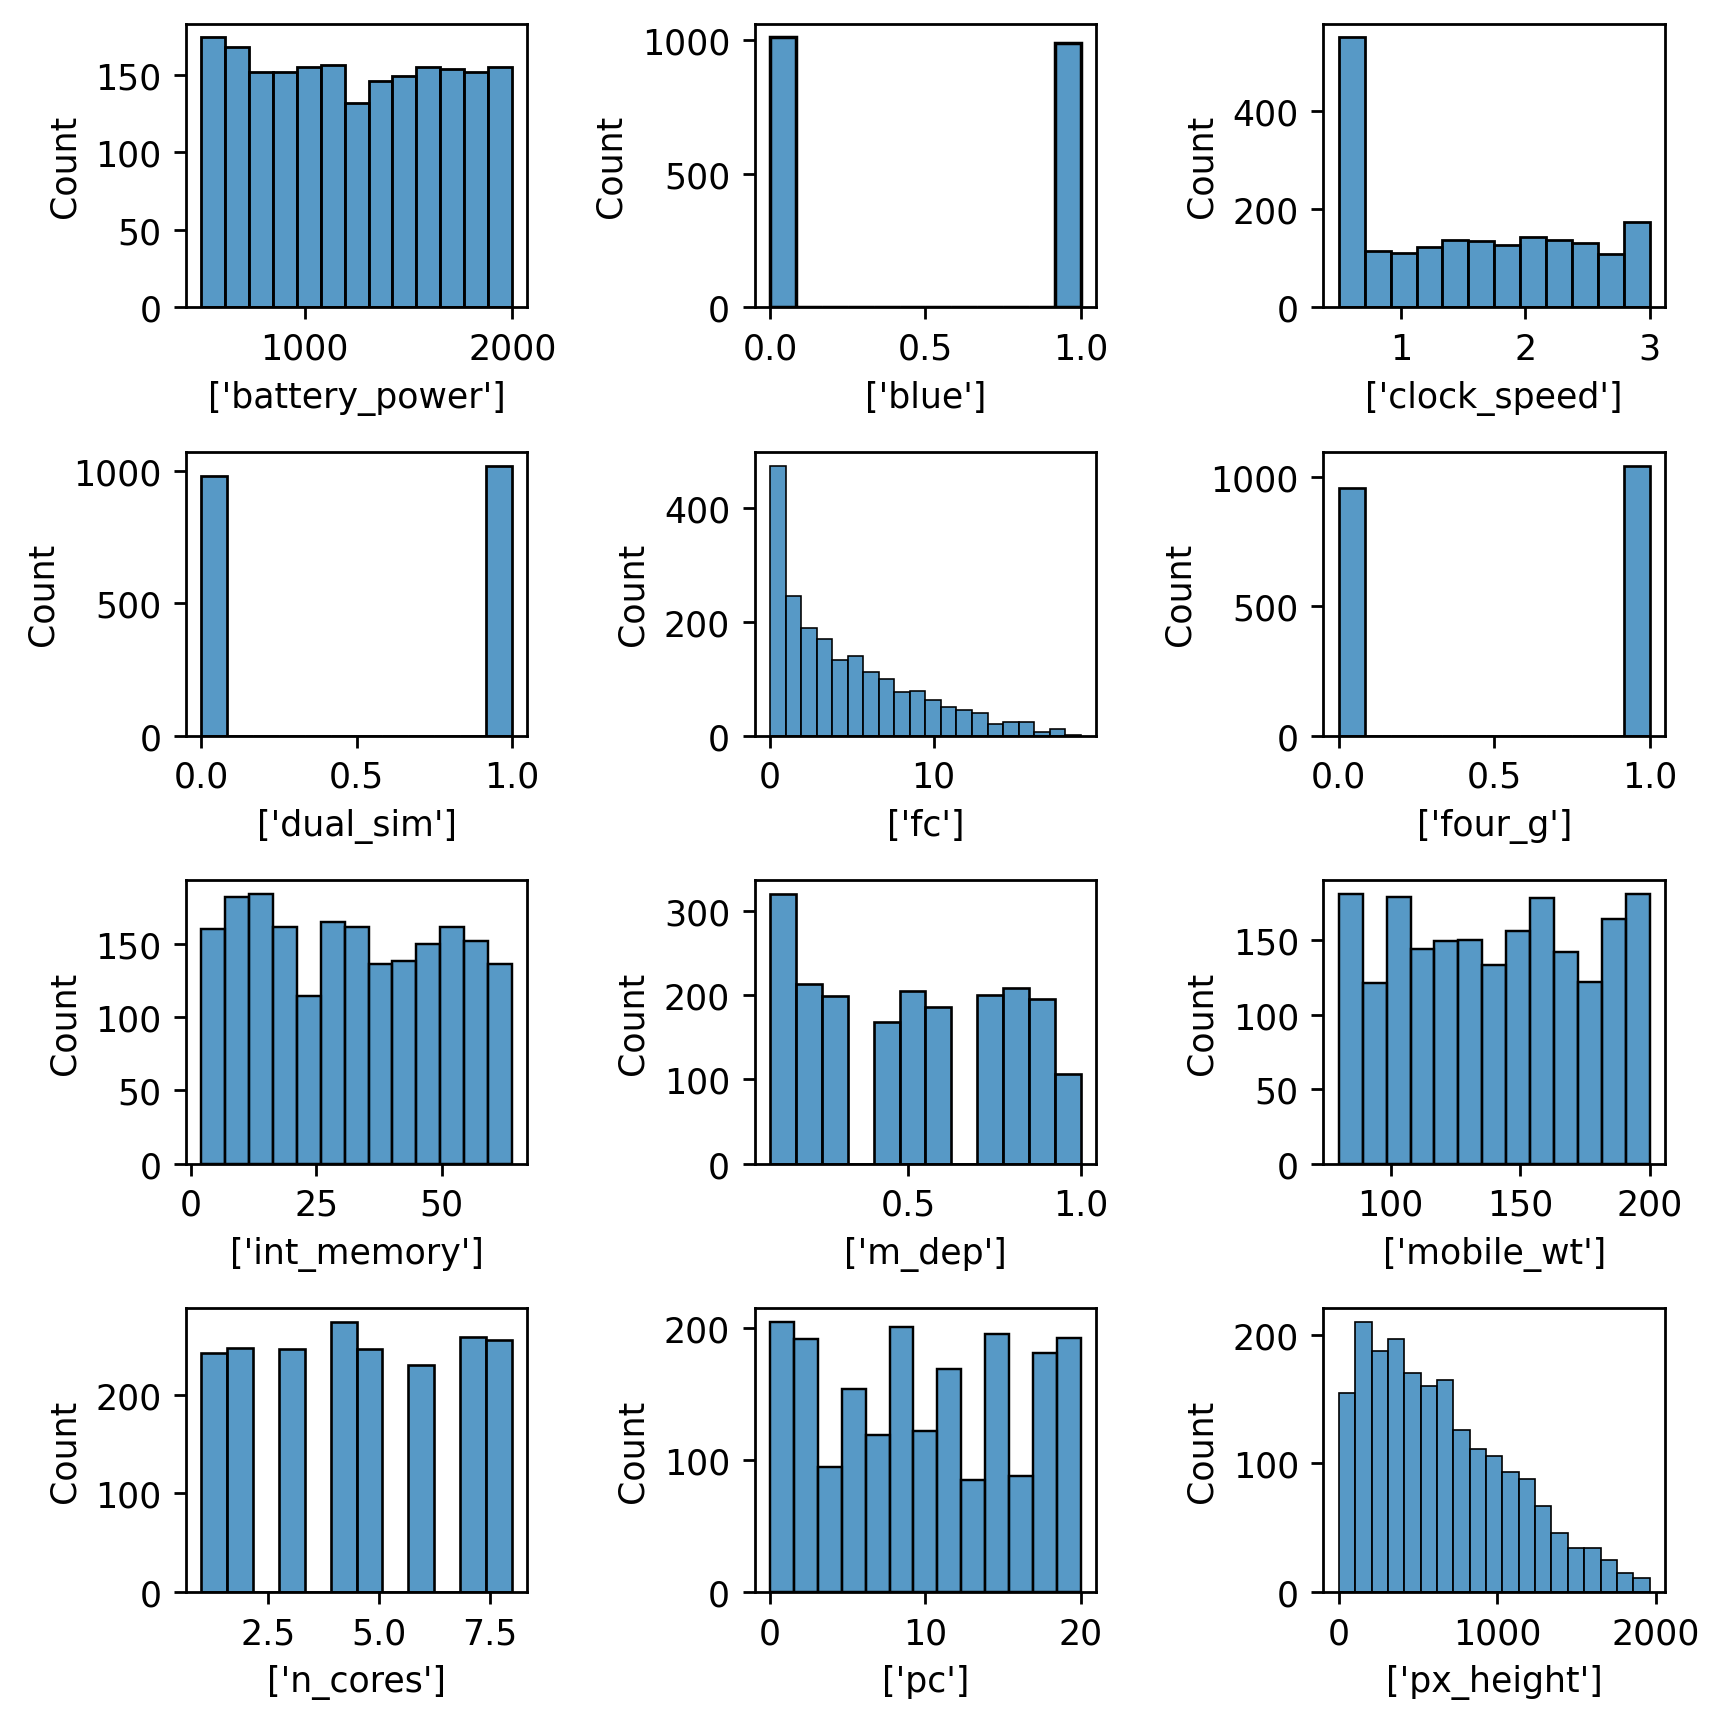

In [14]:
for i, col in enumerate(num_columns):
  if i <= 11:  
    plt.rcParams['figure.figsize'] = (7, 7)
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col])
    plt.xlabel([col])
    plt.tight_layout()
  else:
      break

In [15]:
# some of the columns(fc and px_hieght) are skewed and data is not normally distiributed in any of the columns
# blue and color column is having only two unique values

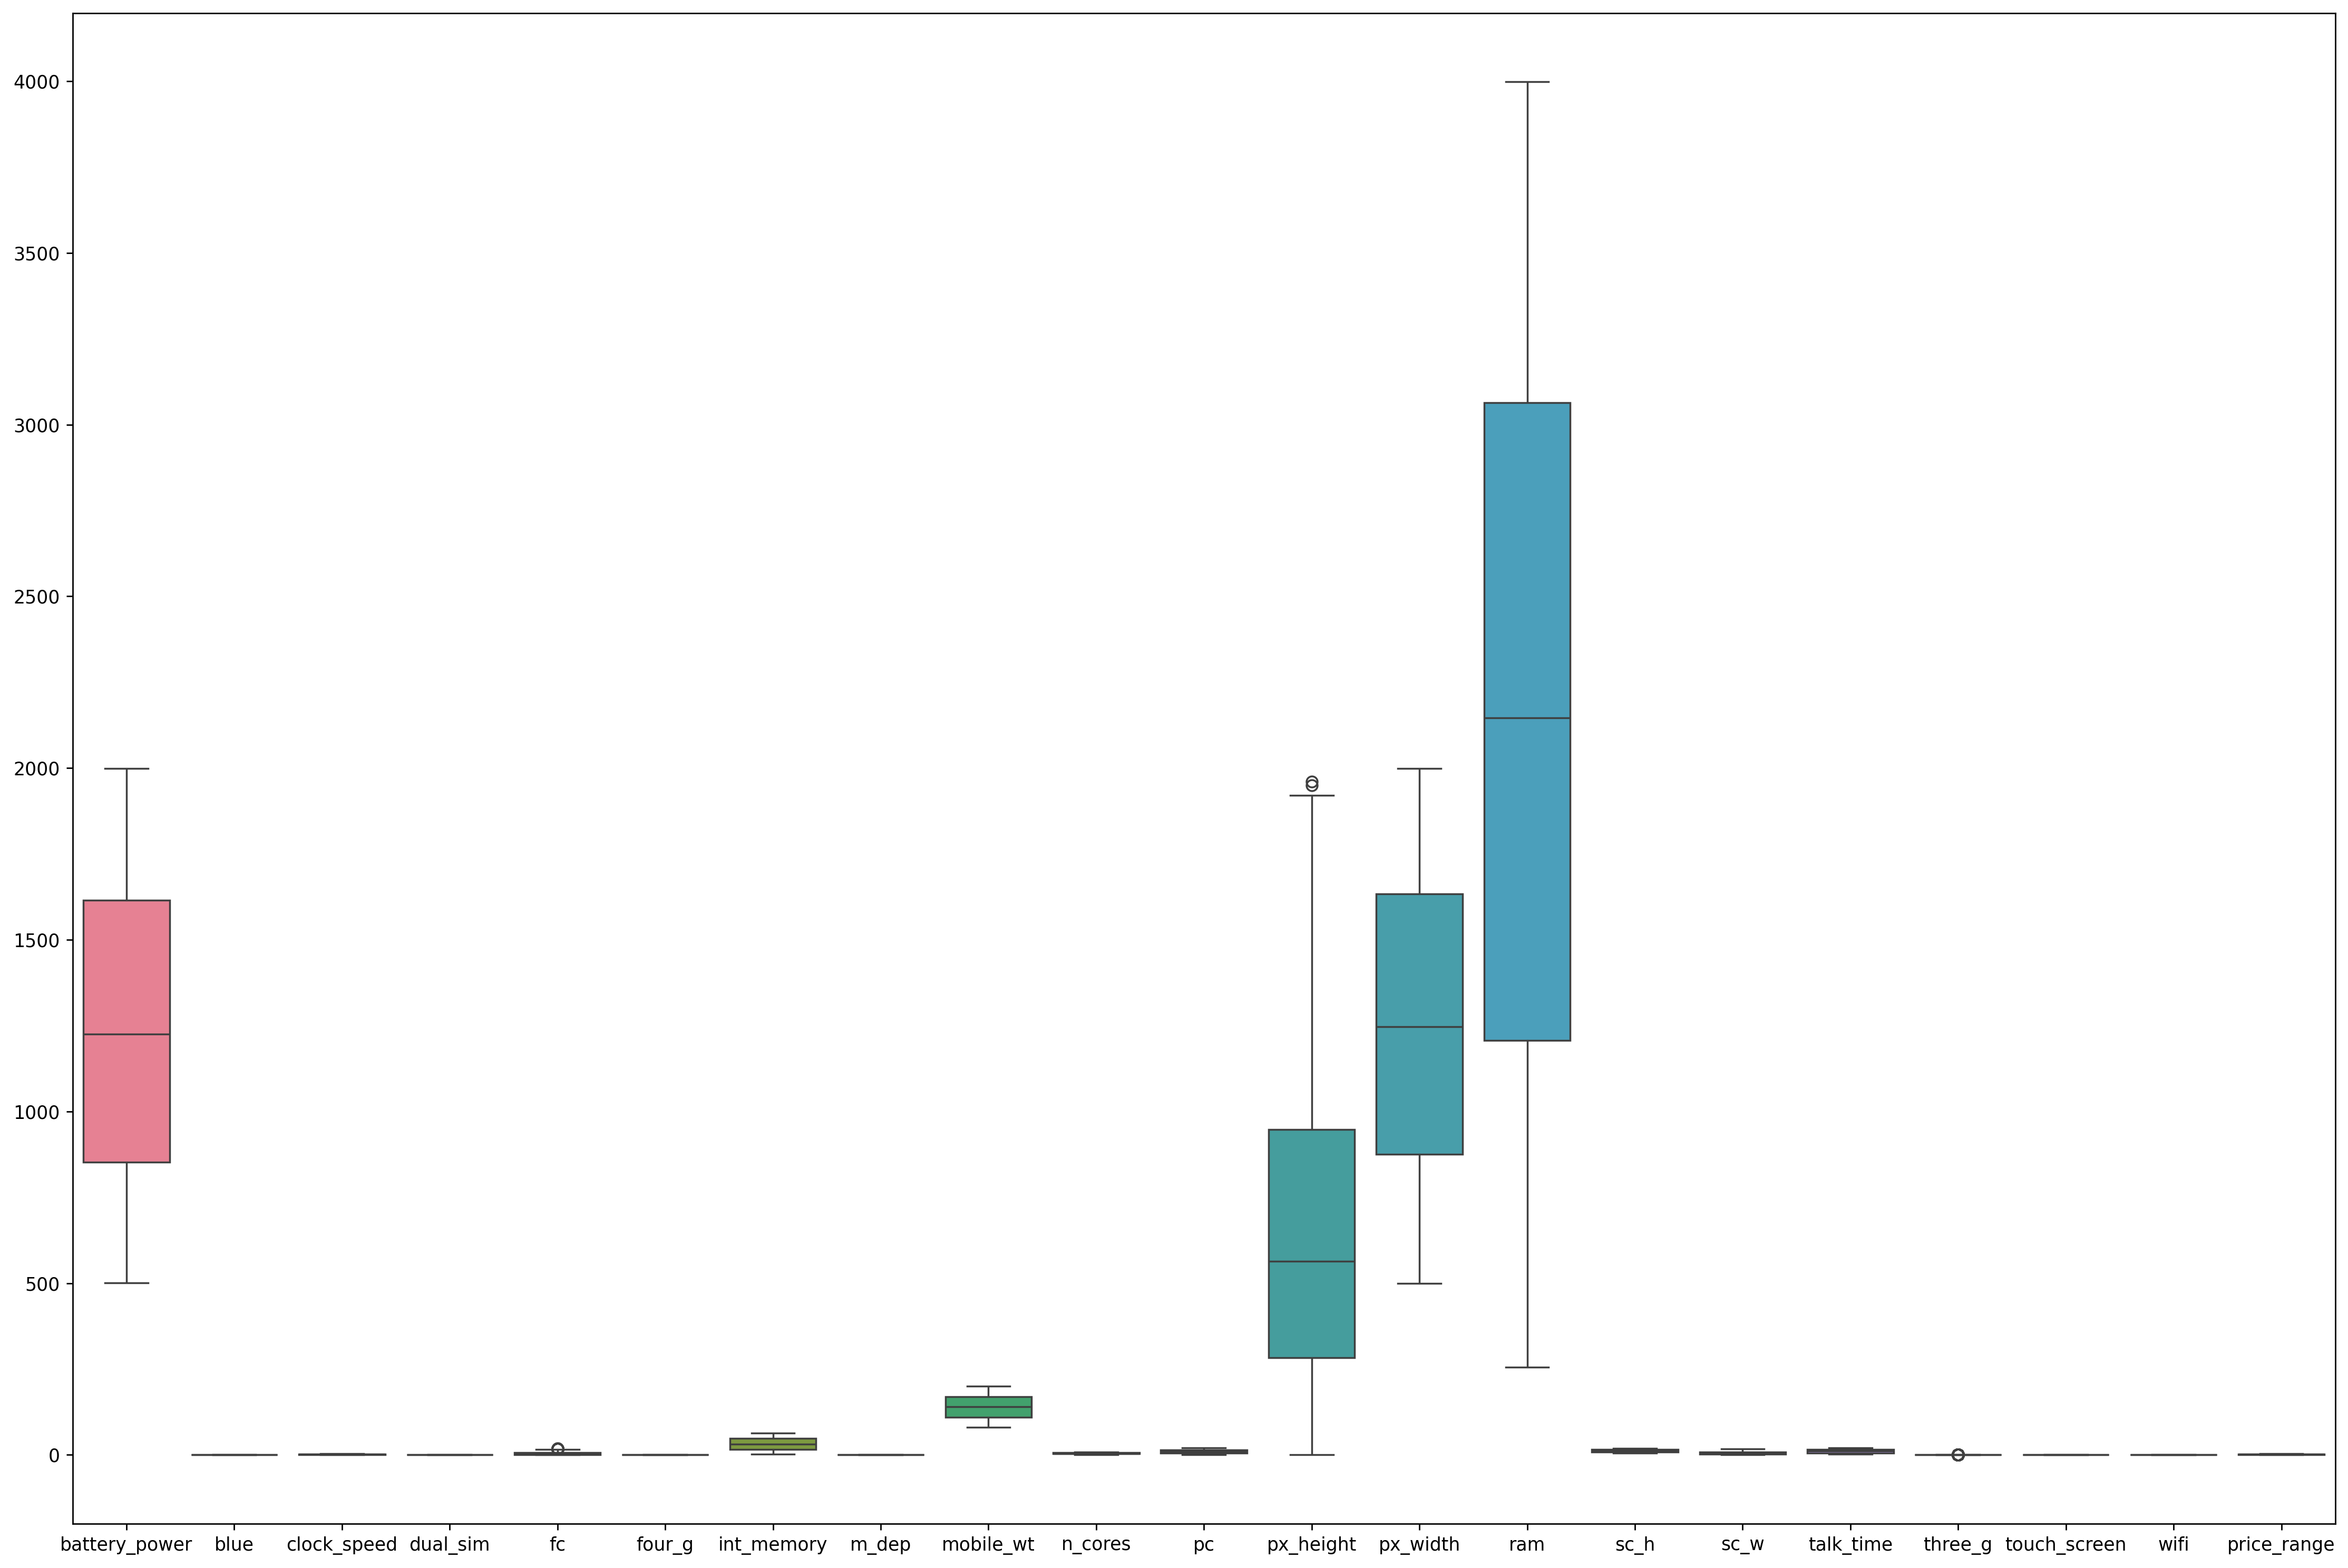

In [16]:
# boxplot
plt.rcParams['figure.figsize'] = (18, 12)
sns.boxplot(df)
plt.tight_layout()

In [17]:
# fc, three_g, px_width column is having outliers
# ram column is having highest variance

# although there are some outliers present in the data I will proceed with the model building
# because I want to see the impact of outliers on the Random Forest algorithm
# after that I will build another model with the clean dataset

# MODEL BUILDING

In [18]:
# defining x and y variables
x = df.drop(columns='price_range')
y = df[['price_range']]

In [19]:
# independent features
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [20]:
# target column
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [21]:
# although the target column is already encoded but Random forest works very well 
# along with categorical target column so I an concerting it's values into text format to make it interpretable and easy

In [22]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [23]:
target = y.copy()
target['price_range'].replace([0,1,2,3], ['low', 'medium', 'high', 'very high'], inplace=True)

In [24]:
target['price_range'].unique()

array(['medium', 'high', 'very high', 'low'], dtype=object)

In [25]:
# splitting data in trianing and testing part

xtrain, xtest, ytrain, ytest = train_test_split(x, target, test_size=0.20, random_state=41)

In [26]:
# model building
model = RandomForestClassifier()

# training model
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [27]:
# by default it creates 100 decision tree models if I dont mention how many models need to be created
#  because I don't know the correct number of models so I continued with by default value

In [28]:
# getting prediction
yp = model.predict(xtest)
yp

array(['low', 'high', 'high', 'very high', 'medium', 'very high',
       'medium', 'high', 'low', 'low', 'high', 'high', 'very high', 'low',
       'medium', 'very high', 'high', 'high', 'high', 'very high',
       'very high', 'very high', 'low', 'low', 'medium', 'low', 'low',
       'low', 'low', 'medium', 'very high', 'high', 'low', 'high', 'low',
       'high', 'low', 'medium', 'medium', 'low', 'medium', 'medium',
       'medium', 'high', 'very high', 'high', 'high', 'high', 'medium',
       'low', 'high', 'high', 'high', 'medium', 'medium', 'medium',
       'very high', 'very high', 'very high', 'medium', 'low',
       'very high', 'high', 'low', 'medium', 'very high', 'medium',
       'medium', 'low', 'high', 'low', 'low', 'high', 'low', 'high',
       'very high', 'low', 'very high', 'medium', 'high', 'very high',
       'very high', 'low', 'very high', 'medium', 'low', 'very high',
       'high', 'low', 'high', 'very high', 'medium', 'very high', 'low',
       'high', 'low', 'v

In [29]:
# model evaluation

print(classification_report(ytest, yp))

              precision    recall  f1-score   support

        high       0.77      0.79      0.78        99
         low       0.91      0.95      0.93        96
      medium       0.81      0.76      0.78        99
   very high       0.92      0.92      0.92       106

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [30]:
# checking list of all the 100 decision trees that has been created
model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=762490862),
 DecisionTreeClassifier(max_features='sqrt', random_state=2094833457),
 DecisionTreeClassifier(max_features='sqrt', random_state=1756520466),
 DecisionTreeClassifier(max_features='sqrt', random_state=37929107),
 DecisionTreeClassifier(max_features='sqrt', random_state=1701644039),
 DecisionTreeClassifier(max_features='sqrt', random_state=2137669594),
 DecisionTreeClassifier(max_features='sqrt', random_state=1059124207),
 DecisionTreeClassifier(max_features='sqrt', random_state=1328807205),
 DecisionTreeClassifier(max_features='sqrt', random_state=1861561135),
 DecisionTreeClassifier(max_features='sqrt', random_state=232071690),
 DecisionTreeClassifier(max_features='sqrt', random_state=1588337917),
 DecisionTreeClassifier(max_features='sqrt', random_state=364032201),
 DecisionTreeClassifier(max_features='sqrt', random_state=889245185),
 DecisionTreeClassifier(max_features='sqrt', random_state=920964324),
 DecisionTree

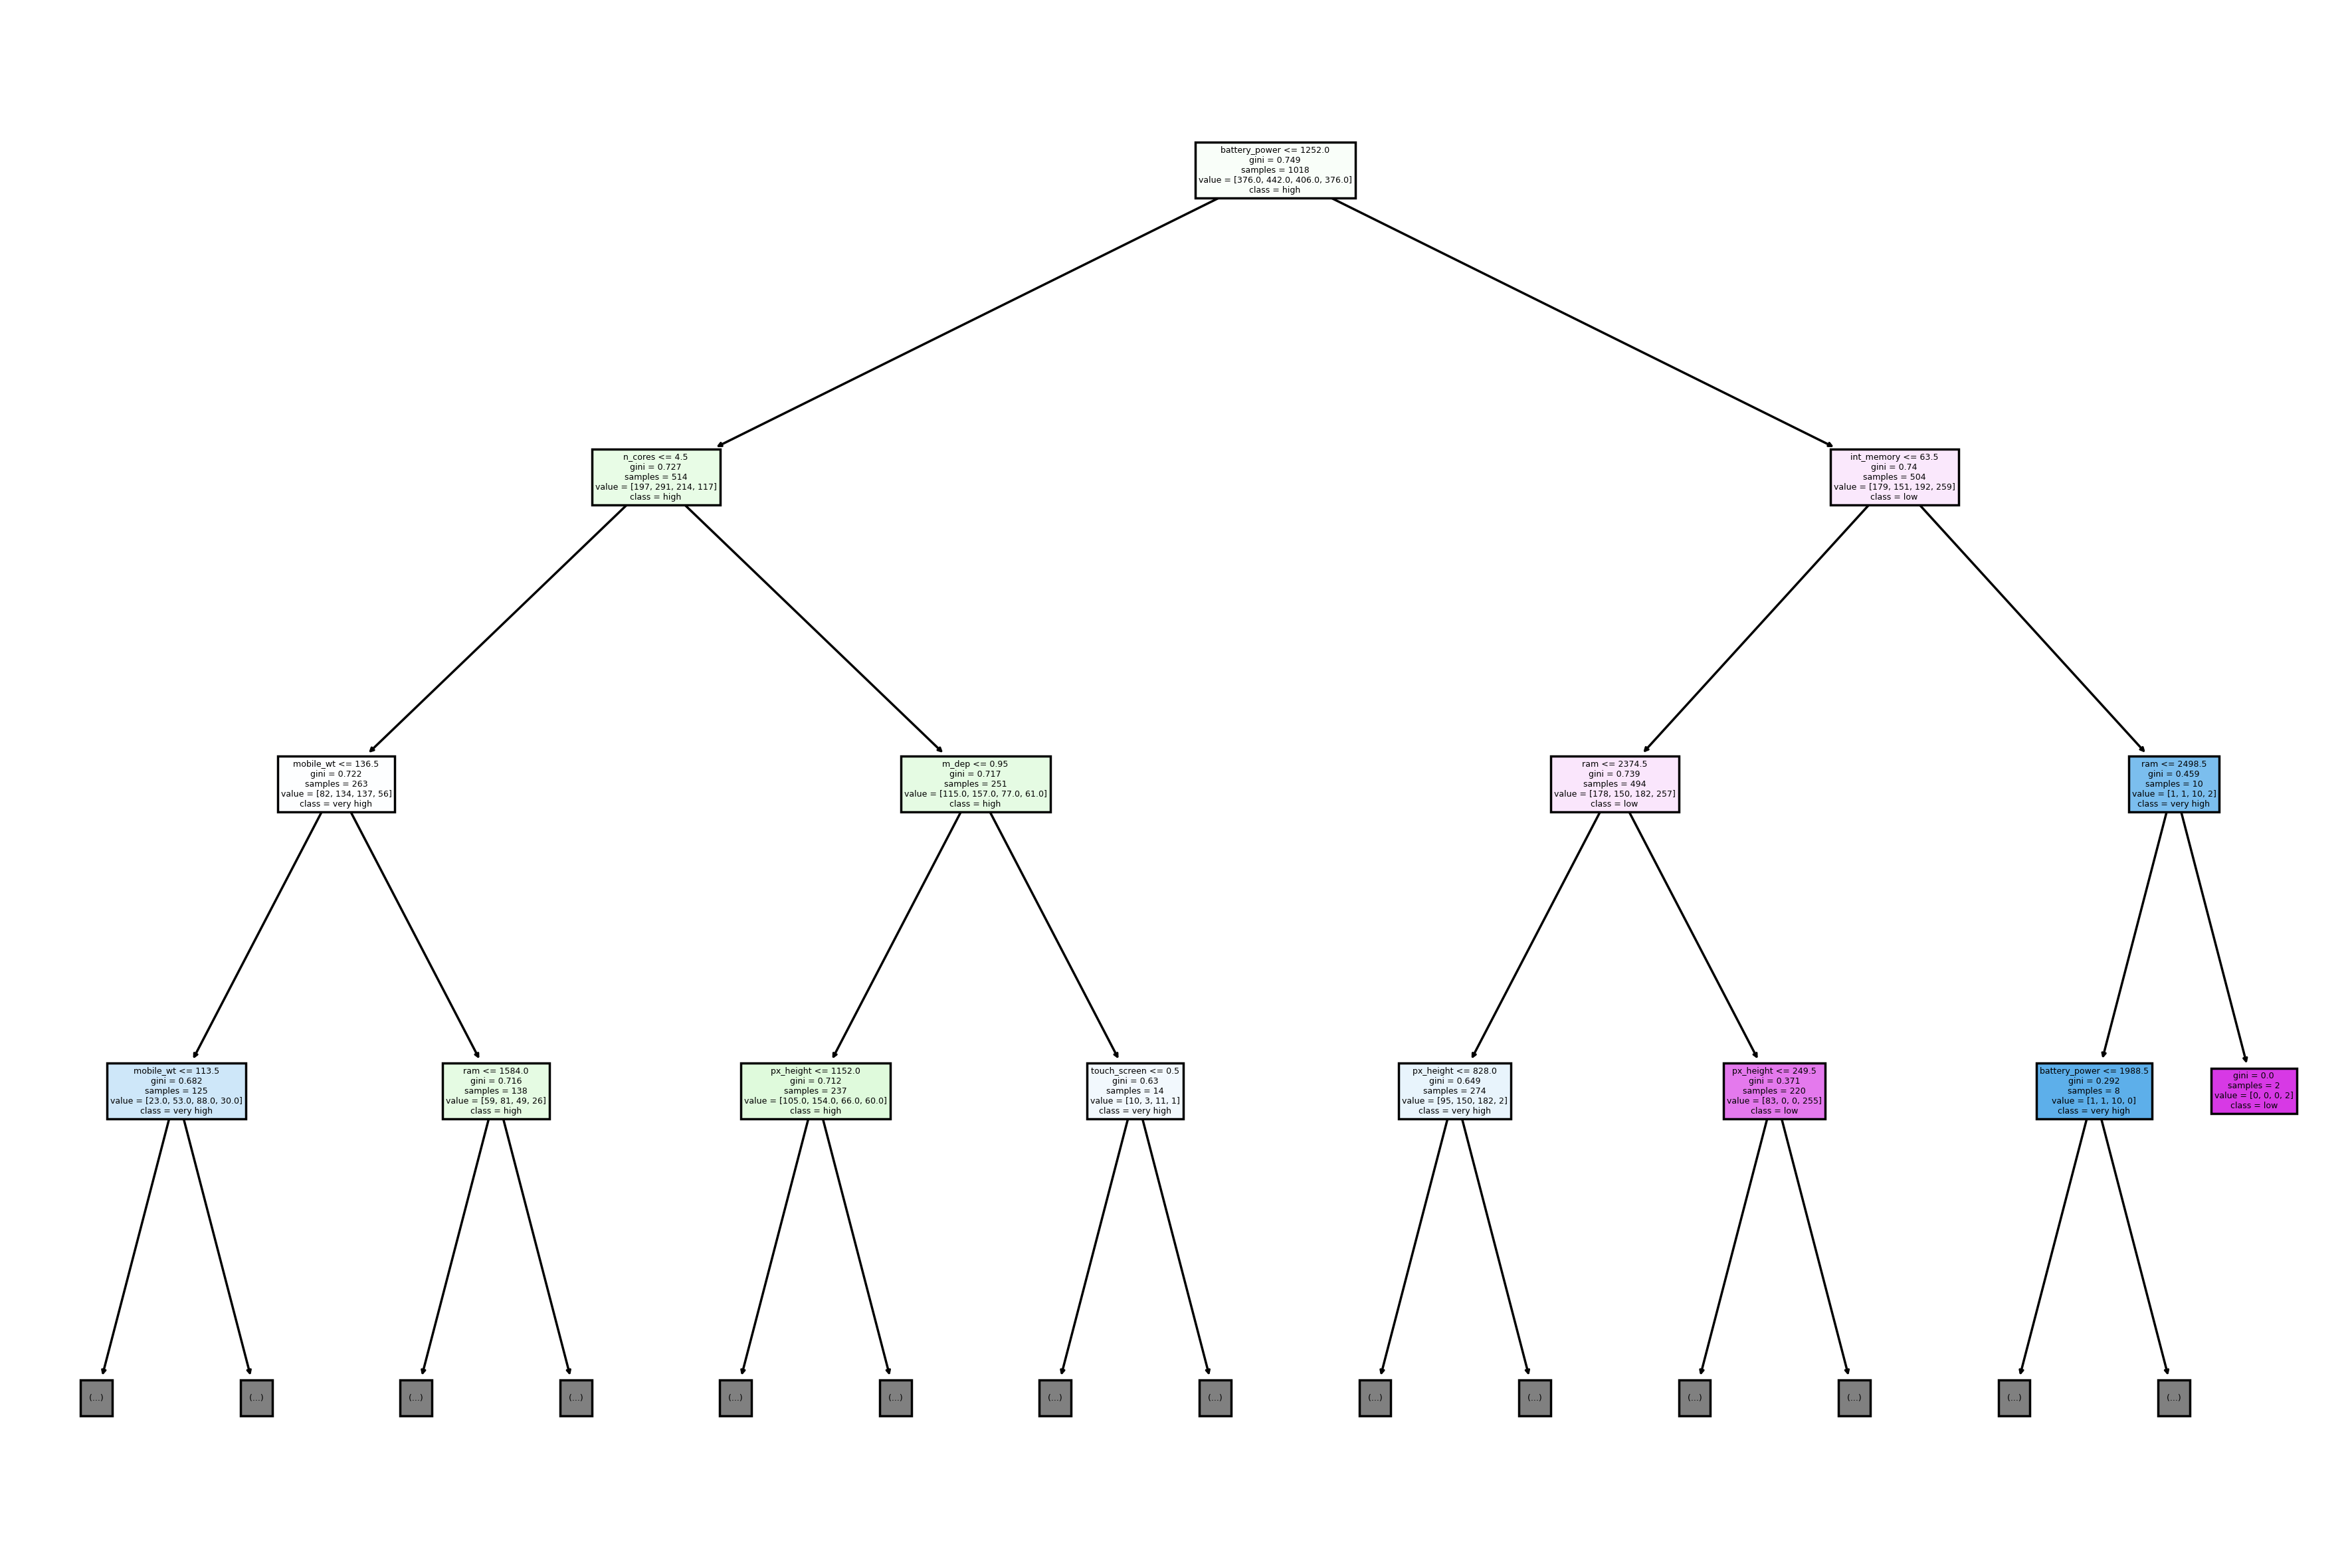

In [31]:
# let's visualize 1st decision Tree
tree.plot_tree(model.estimators_[0], max_depth=3, feature_names=x.columns, class_names=target['price_range'].unique(),filled=True)
plt.show()

# MODEL 2

### OUTLIERS

In [32]:
# function for capping outliers

def capping(data, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        lower = q1 - (1.5 * IQR)
        upper = q3 + (1.5 * IQR)
        data[col] = np.where(data[col] < lower, lower, np.where(data[col] > upper, upper, data[col]))

In [33]:
# capping the outliers

capping(df, df.columns)

<Axes: >

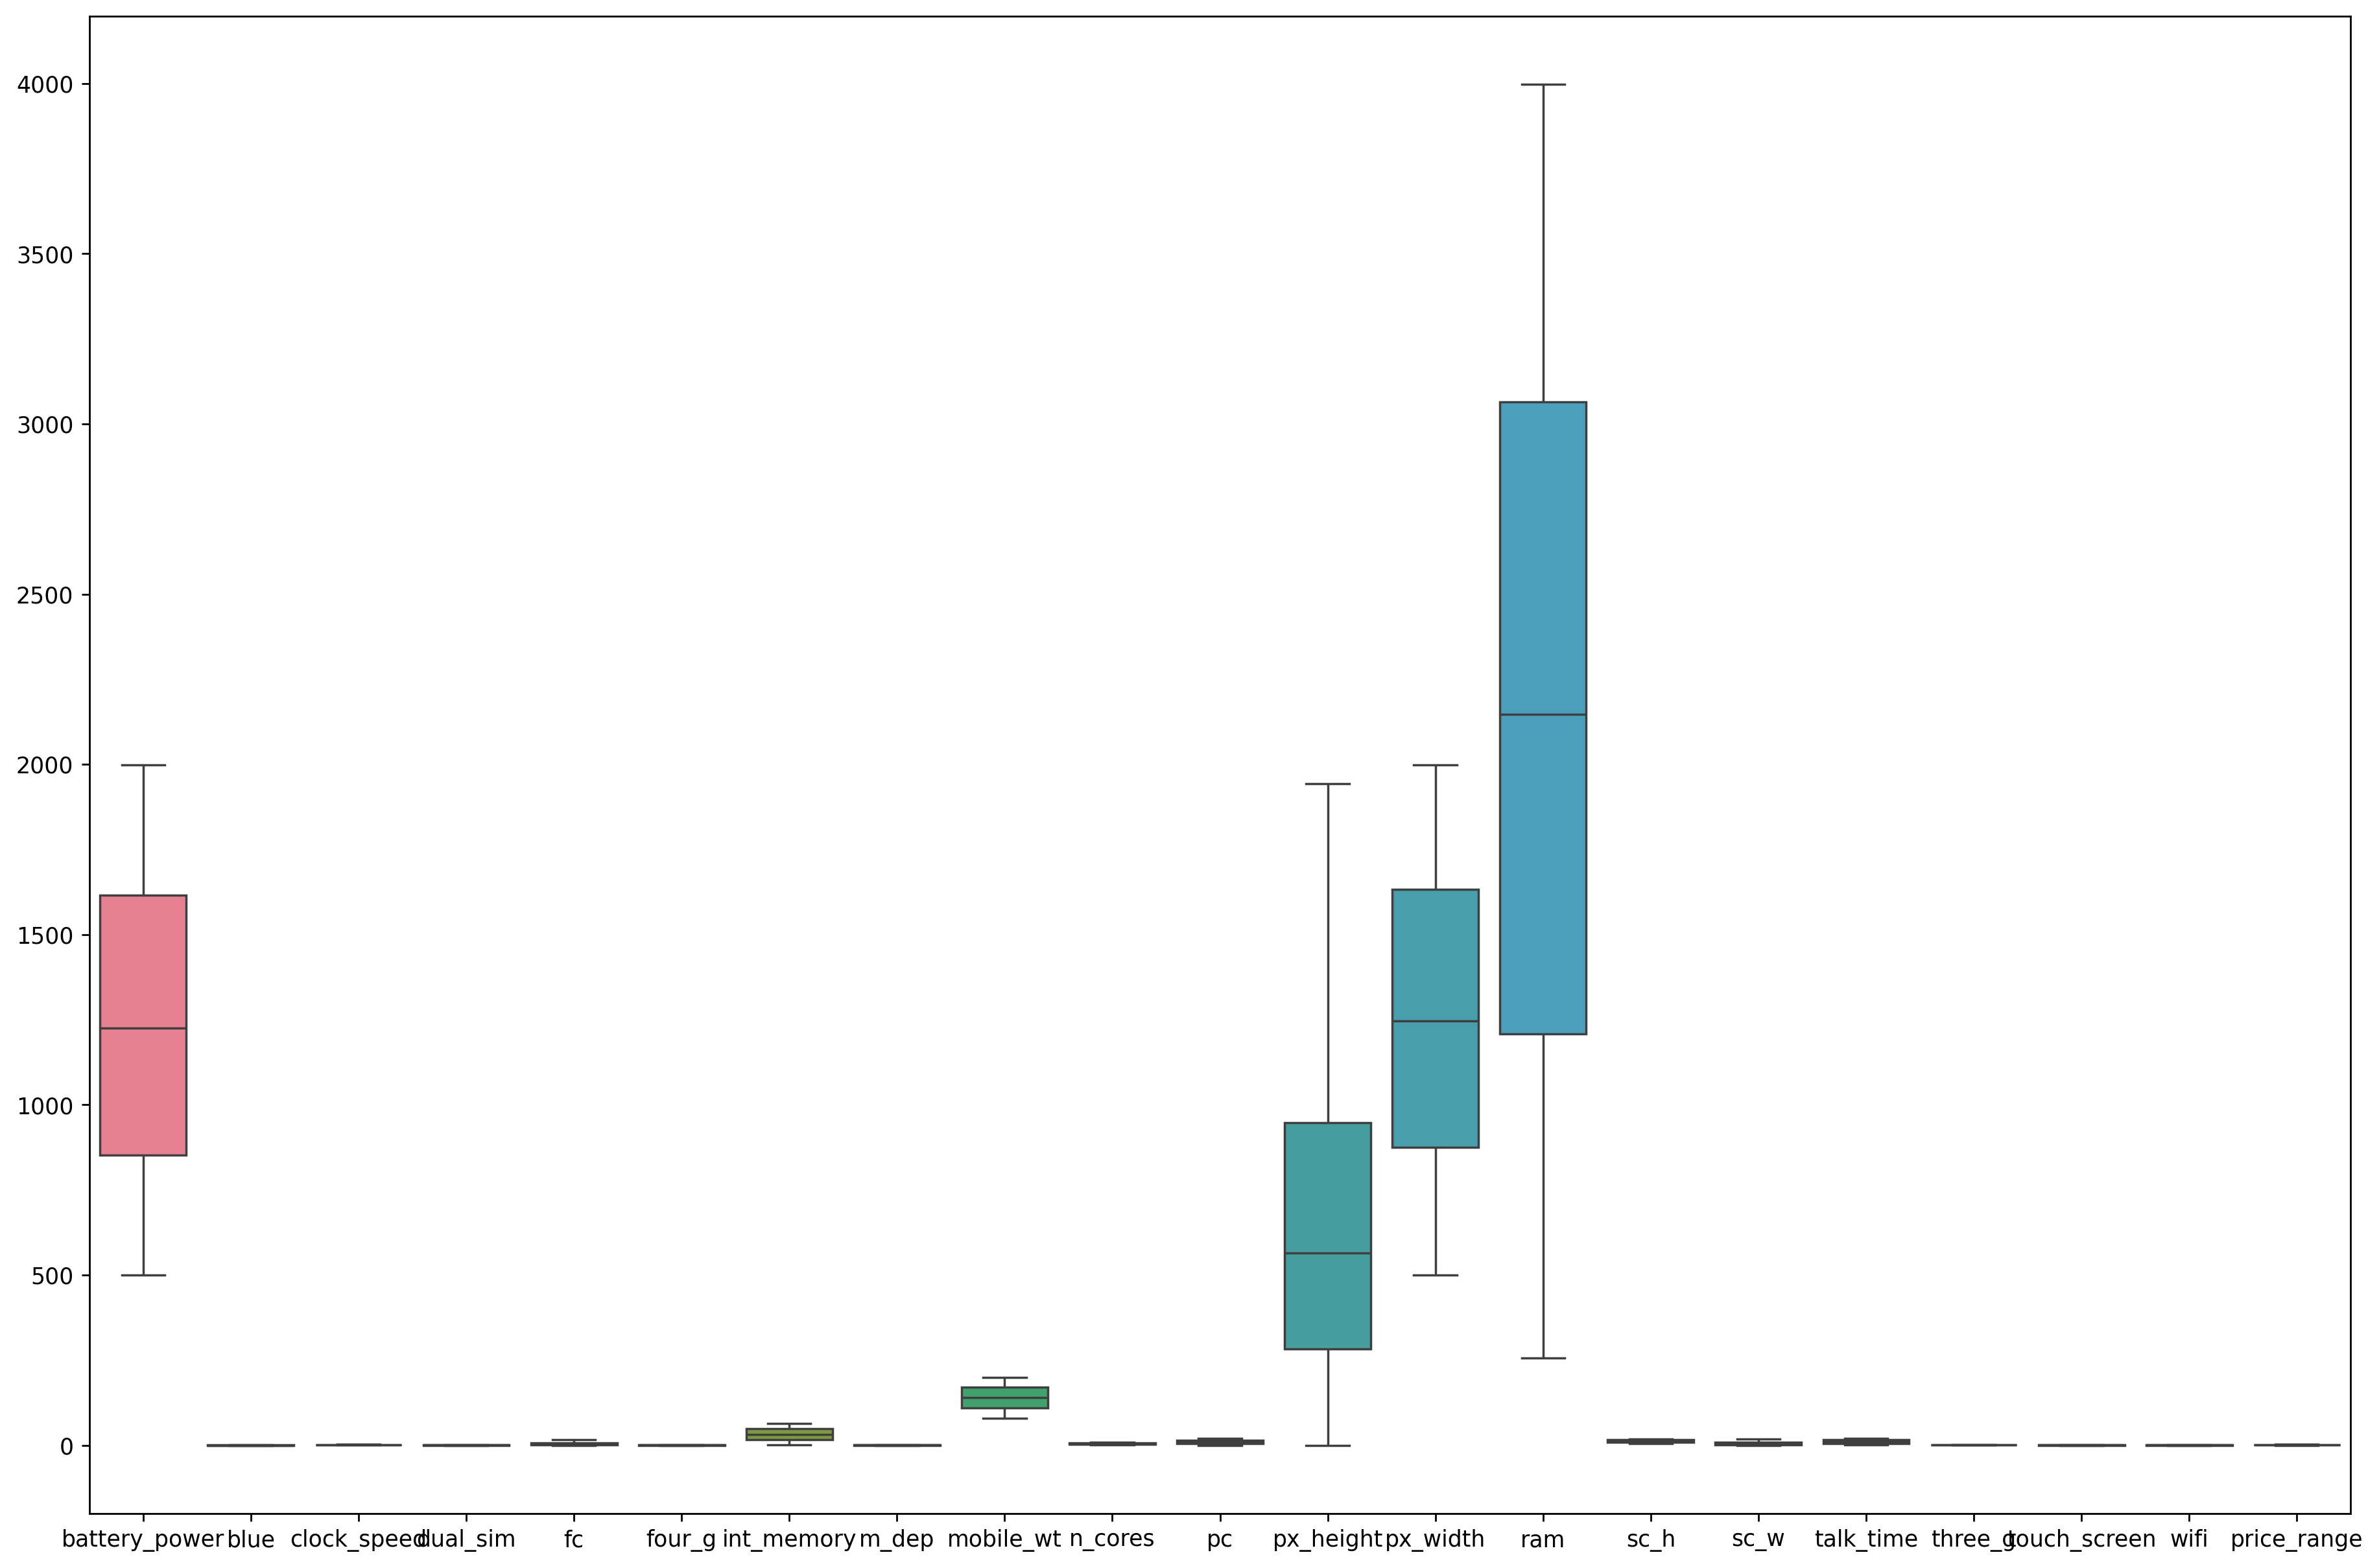

In [34]:
# cross checking the outliers
sns.boxplot(df)

In [ ]:
# all the outliers have been capped

# FEATURE ENGINEERING

## Feature selection

### method 1:   RECURSIVE FEATURE ELEMENATION

In [35]:
# importing yellowbrick liberary for performing RFE
!pip install yellowbrick

In [39]:
from yellowbrick.model_selection import rfecv
from sklearn.tree import DecisionTreeClassifier

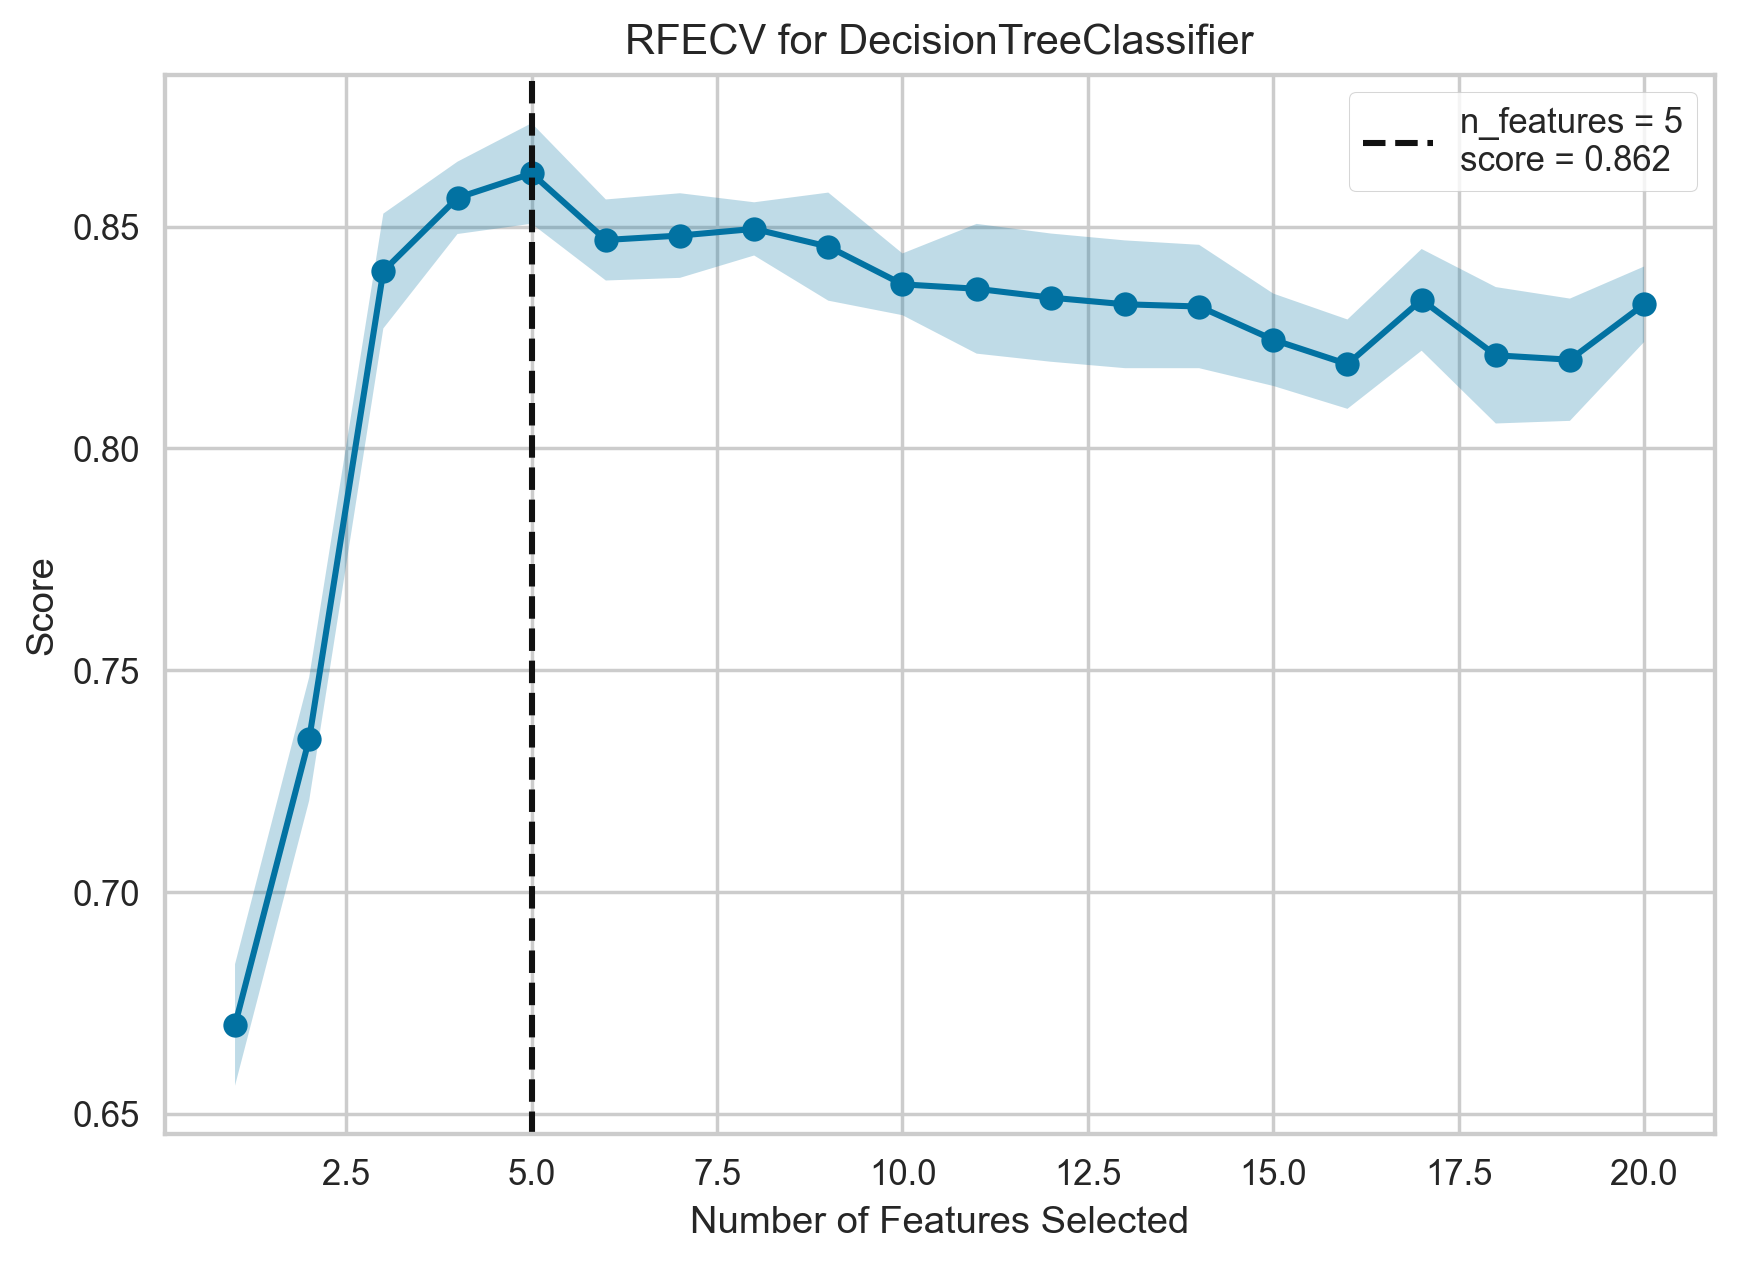

In [40]:
rfe = rfecv(DecisionTreeClassifier(), x, target)

In [41]:
# it is saying that only 5 columns are important
# and if I use these columns then it will give me 86% percentage of accuracy

In [42]:
# asking for important features
rfe.ranking_

array([ 1, 11,  3, 12,  9, 16,  2,  8,  1, 10,  5,  1,  1,  1,  7,  6,  4,
       15, 14, 13])

In [50]:
col_list = x.columns.to_list()
col_list

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [54]:
# converting to dataframe so that I can get only important features

features_imp = pd.DataFrame({'features': col_list,
                            'ranking' : rfe.ranking_
                            })
features_imp[features_imp['ranking'] == 1]

,features,ranking
0,battery_power,1
8,mobile_wt,1
11,px_height,1
12,px_width,1
13,ram,1


## method 2

### TREE BASED METHOD FOR FEATURE SELECTION

In [56]:
# building decision tree and passed complete data

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x, target)

DecisionTreeClassifier(criterion='entropy')

In [59]:
# asking for important features
# decision tree c5.0 has calculated information gain of features according to their imporatance

imp = dt.feature_importances_
imp

array([0.11552444, 0.001     , 0.0050637 , 0.00109759, 0.00068872,
       0.00202497, 0.00819422, 0.00492578, 0.02213092, 0.00432992,
       0.00517245, 0.06175604, 0.07959076, 0.67326769, 0.00222415,
       0.00431948, 0.00678675, 0.        , 0.00190241, 0.        ])

In [65]:
# converted to list
imp = imp.tolist()

In [68]:
# converting to dataframe to know the importacne of features
feat_imp = pd.DataFrame({
    'features' : x.columns,
    'importance' : imp
})
feat_imp.sort_values(by='importance', ascending=False)

,features,importance
13,ram,0.673268
0,battery_power,0.115524
12,px_width,0.079591
11,px_height,0.061756
8,mobile_wt,0.022131
6,int_memory,0.008194
16,talk_time,0.006787
10,pc,0.005172
2,clock_speed,0.005064
7,m_dep,0.004926


# observation
### both of these methods are suggesting that ram, battery_power, px_width, px_height, mobile_wt columns are important
### so I will use ram, battery_power, px_width, px_height, mobile_wt, int_memory, talk_time columns for model building

In [87]:
df[['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'int_memory', 'talk_time']]

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,talk_time
0,2549.0,842.0,756.0,20.0,188.0,7.0,19.0
1,2631.0,1021.0,1988.0,905.0,136.0,53.0,7.0
2,2603.0,563.0,1716.0,1263.0,145.0,41.0,9.0
3,2769.0,615.0,1786.0,1216.0,131.0,10.0,11.0
4,1411.0,1821.0,1212.0,1208.0,141.0,44.0,15.0
...,...,...,...,...,...,...,...
1995,668.0,794.0,1890.0,1222.0,106.0,2.0,19.0
1996,2032.0,1965.0,1965.0,915.0,187.0,39.0,16.0
1997,3057.0,1911.0,1632.0,868.0,108.0,36.0,5.0
1998,869.0,1512.0,670.0,336.0,145.0,46.0,19.0


In [89]:
# final model

final_model = RandomForestClassifier()
final_model.fit(xtrain[['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'int_memory', 'talk_time']], ytrain )

RandomForestClassifier()

In [90]:
# getting prediction
ypred = final_model.predict(xtest[['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'int_memory', 'talk_time']])
ypred

array(['low', 'high', 'high', 'very high', 'high', 'very high', 'medium',
       'high', 'low', 'low', 'high', 'high', 'very high', 'low', 'medium',
       'very high', 'medium', 'high', 'high', 'very high', 'high',
       'very high', 'low', 'low', 'medium', 'low', 'low', 'low', 'low',
       'medium', 'very high', 'high', 'low', 'high', 'medium', 'high',
       'medium', 'medium', 'low', 'low', 'medium', 'high', 'medium',
       'high', 'very high', 'high', 'high', 'high', 'medium', 'low',
       'high', 'high', 'high', 'medium', 'medium', 'medium', 'very high',
       'very high', 'very high', 'medium', 'low', 'very high', 'high',
       'low', 'high', 'very high', 'medium', 'medium', 'low', 'medium',
       'low', 'low', 'high', 'low', 'high', 'very high', 'low',
       'very high', 'medium', 'high', 'very high', 'very high', 'low',
       'very high', 'high', 'low', 'very high', 'high', 'low', 'high',
       'very high', 'medium', 'very high', 'low', 'medium', 'low',
       'very 

In [82]:
len(ypred)

400

# model Evaluation

In [91]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

        high       0.82      0.85      0.83        99
         low       0.91      0.95      0.93        96
      medium       0.85      0.81      0.83        99
   very high       0.94      0.92      0.93       106

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [ ]:
# accurary of model is 0.88(88%)
# accuracy of the model increased by almost 3 percent